In [1]:
import pandas as pd
import numpy as np
import csv

In [54]:

import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import re
import seaborn as sns
import matplotlib.pyplot as plt
import base64
import string
from collections import Counter
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words

In [18]:
kumparan = pd.read_csv('Kumparan1.csv', encoding= 'utf8', sep=';')

In [28]:
kumparan

,No,Title
0,0,Danang Parikesit Ditunjuk Jadi Kepala Badan Pe...
1,1,"Sebelum jadi Kepala BPJT, Danang Parikesit ada..."
2,2,kumparanBISNIS
3,3,8 Februari 2019
4,4,Kementerian PUPR Bangun 1.070 Rumah Khusus di ...
5,5,Pembangunan 1.070 unit rumah khusus itu dilaku...
6,6,SulbarUpdate.id
7,7,4 Februari 2019
8,8,Ada Wacana Harga Rumah yang Bisa Disubsidi Tak...
9,9,"Hanya saja, uang pangkal atau DP bisa lebih ma..."


In [29]:
indexes_to_drop = ([2,3])

In [30]:
indexes_to_keep = set(range(kumparan.shape[0])) - set(indexes_to_drop)
df_sliced = kumparan.take(list(indexes_to_keep))

In [32]:
df_sliced

,No,Title
0,0,Danang Parikesit Ditunjuk Jadi Kepala Badan Pe...
1,1,"Sebelum jadi Kepala BPJT, Danang Parikesit ada..."
4,4,Kementerian PUPR Bangun 1.070 Rumah Khusus di ...
5,5,Pembangunan 1.070 unit rumah khusus itu dilaku...
6,6,SulbarUpdate.id
7,7,4 Februari 2019
8,8,Ada Wacana Harga Rumah yang Bisa Disubsidi Tak...
9,9,"Hanya saja, uang pangkal atau DP bisa lebih ma..."
10,10,kumparanBISNIS
11,11,4 Februari 2019


In [45]:
kumparan_df = kumparan[kumparan['Title'].apply(lambda x: len(x.split(' ')) > 3)]

In [50]:
kumparan_df = kumparan_df.drop_duplicates(subset=['Title'], keep='first')

In [53]:
KumparanData = kumparan_df[kumparan_df['Title'].apply(lambda x: len(x.split(' ')) < 12)]

In [68]:
KumparanData

,No,Title
0,0,Danang Parikesit Ditunjuk Jadi Kepala Badan Pe...
4,4,Kementerian PUPR Bangun 1.070 Rumah Khusus di ...
8,8,Ada Wacana Harga Rumah yang Bisa Disubsidi Tak...
9,9,"Hanya saja, uang pangkal atau DP bisa lebih ma..."
12,12,"Harga Rumah yang Bisa Disubsidi di 2019 Naik, ..."
17,17,"Sebanyak 98,68 persen investasi swasta adalah ..."
20,20,PUPR Usul Pembangunan Trans Papua di Nduga Dit...
28,28,Jokowi Minta PUPR Segera Perbaiki SMPN 1 Muara...
32,32,PUPR Siapkan Rp 450 M untuk Infrastruktur Anti...
33,33,Kementerian PUPR akan membangun stasiun pompa ...


In [55]:
tags_lower = KumparanData['Title'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
tags_remove_pun = re.sub('[^A-Za-z]+', ' ', tags_lower)

In [56]:
stop_words = list(get_stop_words('id'))         
nltk_words = list(stopwords.words('indonesian'))   
stop_words.extend(nltk_words)

In [57]:
word_tokens_tags = word_tokenize(tags_remove_pun)
filtered_sentence_tags = [w_tags for w_tags in word_tokens_tags if not w_tags in stop_words]
filtered_sentence_tags = []
for w_tags in word_tokens_tags:
    if w_tags not in stop_words:
        filtered_sentence_tags.append(w_tags)

In [58]:
without_single_chr_tags = [word_tags for word_tags in filtered_sentence_tags if len(word_tags) > 2]

In [59]:
cleaned_data_tags = [word_tags for word_tags in without_single_chr_tags if not word_tags.isnumeric()]    

In [60]:
top_N = 10000

In [61]:
word_dist_tags = nltk.FreqDist(cleaned_data_tags)
rslt_tags = pd.DataFrame(word_dist_tags.most_common(top_N),
                    columns=['Word', 'Frequency'])

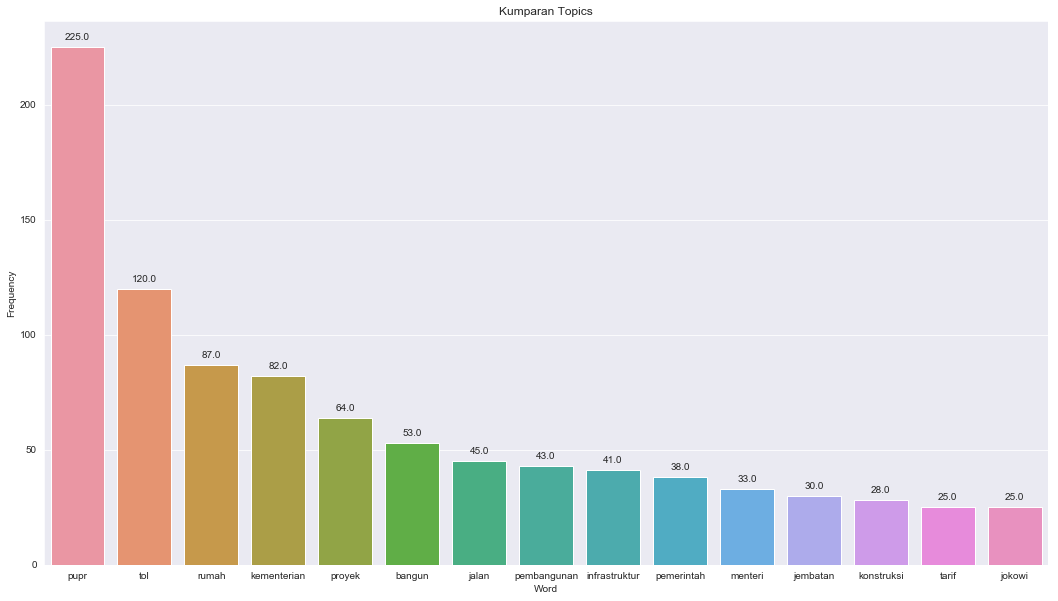

In [63]:
plt.figure(figsize=(18,10))
sns.set_style("darkgrid")
plt.title('Kumparan Topics')
ax = sns.barplot(x="Word",y="Frequency", data=rslt_tags.head(15))


rects = ax.patches

for rect in rects:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va=va)

In [64]:
bloblist_desc = list()
from translate import Translator
translator= Translator(from_lang="id", to_lang="en")

In [66]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')

In [67]:
train_descr_str1=KumparanData['Title'].astype(str)
for row in train_descr_str1:
    an = translator.translate(row)
    blob = TextBlob(an)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    train_polarity_desc1 = pd.DataFrame(bloblist_desc, columns = ['sentence','polarity','subjectivity'])


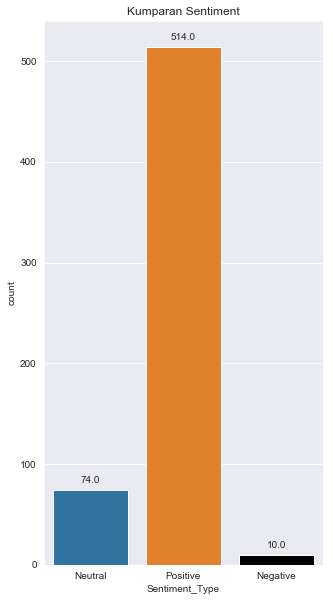

In [69]:
 
def f(train_polarity_desc1):
    if train_polarity_desc1['polarity'] > 0:
        val = "Positive"
    elif train_polarity_desc1['polarity'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

train_polarity_desc1['Sentiment_Type'] = train_polarity_desc1.apply(f, axis=1)

plt.figure(figsize=(5,10))
sns.set_style("darkgrid")
plt.title('Kumparan Sentiment')
ax = sns.countplot(x="Sentiment_Type", data=train_polarity_desc1, palette=["C0", "C1", "k"])

rects = ax.patches

for rect in rects:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va=va)


In [72]:
train_polarity_desc1

,sentence,polarity,subjectivity,Sentiment_Type
0,Danang Parikesit Ditunjuk Jadi Kepala Badan Pe...,0.000000,0.000000,Neutral
1,Kementerian PUPR Bangun 1.070 Rumah Khusus di ...,0.357143,0.571429,Positive
2,Ada Wacana Harga Rumah yang Bisa Disubsidi Tak...,0.000000,0.000000,Neutral
3,"Hanya saja, uang pangkal atau DP bisa lebih ma...",-0.051852,0.496296,Negative
4,"Harga Rumah yang Bisa Disubsidi di 2019 Naik, ...",0.000000,0.000000,Neutral
5,"Sebanyak 98,68 persen investasi swasta adalah ...",0.000000,0.562500,Neutral
6,PUPR Usul Pembangunan Trans Papua di Nduga Dit...,-0.125000,0.375000,Negative
7,Jokowi Minta PUPR Segera Perbaiki SMPN 1 Muara...,0.000000,0.033333,Neutral
8,PUPR Siapkan Rp 450 M untuk Infrastruktur Anti...,0.000000,0.000000,Neutral
9,Kementerian PUPR akan membangun stasiun pompa ...,0.000000,0.000000,Neutral
